# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: 

In [ ]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [ ]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

In [ ]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

In [ ]:
import matplotlib.pyplot as plt

#Crear figura antes del gráfico y da dimensiones
plt.figure(figsize=(17,7))

#Crear el grafico de defunciones
plt.plot(df['Año'],df['Defunciones'],label='Defunciones', marker = "o", linestyle='-',linewidth=2, color='red')
plt.plot(df['Año'],df['Nacimientos'],label='Nacimientos', marker = "o", linestyle='-',linewidth=2, color='green')

#Asignar titulo
plt.title('Tendencias de Defunciones y Nacimientos por año (Datos Historicos)', fontsize=18, fontweight='bold')

#Leyenda Eje y
plt.ylabel('Número de Defunciones', fontsize=12)

#Leyenda Eje x
plt.xlabel('Año', fontsize=12)

#Dibuja la cuadricula en el fondo
plt.grid(axis='both', linestyle='--',alpha=0.6)

#Mostrar los label de las series
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

#Crear figura antes del gráfico y da dimensiones
plt.figure(figsize=(17,7))

#Crear el grafico de defunciones
plt.plot(df['Año'],df['Nacimientos'],label='Nacimientos', marker = "o", linestyle='-',linewidth=2, color='green')

#Asignar titulo
plt.title('Tendencias de Nacimientos por año (Datos Historicos)', fontsize=18, fontweight='bold')

#Leyenda Eje y
plt.ylabel('Número de Defunciones', fontsize=12)

#Leyenda Eje x
plt.xlabel('Año', fontsize=12)

#Dibuja la cuadricula en el fondo
plt.grid(axis='both', linestyle='--',alpha=0.6)

#Mostrar los label de las series
plt.legend()
plt.show()

### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [ ]:
# Seleccionar las columnas de Año y Nacimientos
filtro = ['Año','Nacimientos']

print(df[filtro])

In [ ]:
# Seleccionar las columnas de Año y Nacimientos
print(df[['Año','Nacimientos']])

In [49]:
# Filtrar datos desde el año 2010
df_filtrado = df[df['Año'] >= 2010]
df_filtrado

,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [54]:
# total_nacimientos
total_nacimientos = df_filtrado['Nacimientos'].sum()

# total_defunciones
total_defunciones  = df_filtrado['Defunciones'].sum()

print(f'Total de Nacimientos: {total_nacimientos}')
print(f'Total de Defunciones: {total_defunciones}')

Total de Nacimientos: 815543
Total de Defunciones: 269565


**2\. Añadir una nueva columna con el saldo poblacional :**

In [ ]:
#Saldo Poblacional
df['Saldo Poblacional'] = df['Nacimientos'] - df['Defunciones']
df.head()

,Año,Nacimientos,Defunciones,Saldo Poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos del ultimo año**

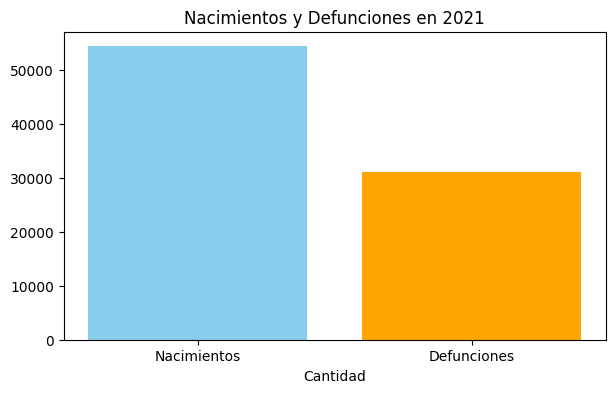

In [67]:
import matplotlib.pyplot as plt
ultimo_anio = df['Año'].max()

df_filtrado = df[df['Año'] == ultimo_anio]

plt.figure(figsize=(7,4))
plt.bar(['Nacimientos', 'Defunciones'], [df_filtrado['Nacimientos'].values[0], df_filtrado['Defunciones'].values[0]], color=['skyblue', 'orange'])
plt.title(f'Nacimientos y Defunciones en {df_filtrado["Año"].values[0]}')
plt.xlabel('Cantidad')
plt.show()


### **Gráfico de barras: Comparación de nacimientos y defunciones**

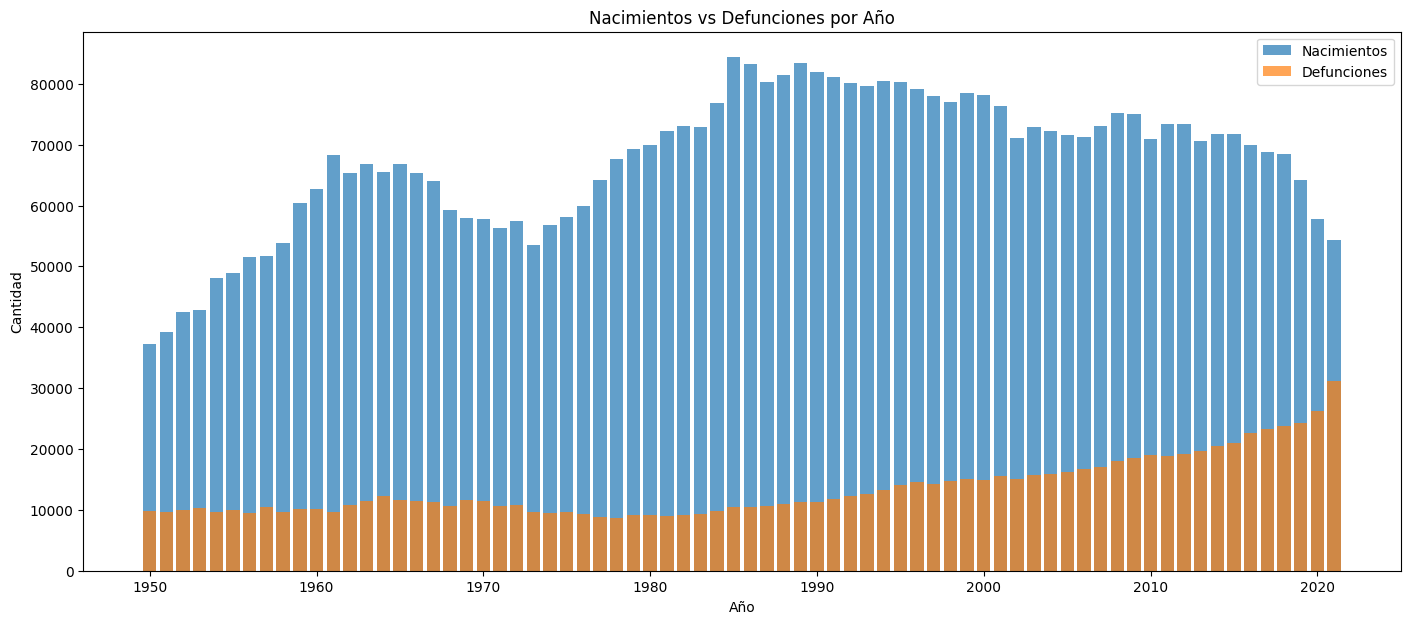

In [71]:
# Crear gráfico de barras
plt.figure(figsize=(17,7))
plt.bar(df['Año'],df['Nacimientos'],label='Nacimientos', alpha=0.7)
plt.bar(df['Año'],df['Defunciones'],label='Defunciones', alpha=0.7)
plt.title('Nacimientos vs Defunciones por Año')
plt.ylabel('Cantidad')
plt.xlabel('Año')
plt.legend()
plt.show()

In [ ]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]

# Crear gráfico de barras



### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [ ]:
#


2. **Calcular promedios:**

In [ ]:
#

3. **Graficar:**

In [ ]:
#
